In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import seaborn
import os
import io
import math

In [39]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass
    
    output_path = f'{image_path}/{image_name}'
    fg.savefig(output_path, dpi=400)

def get_data_type(betas, path):
    data = []
    for beta in betas:
        data.append(pd.read_csv(f'{path}/wilson_loop_beta={beta}.csv'))
        data[-1]['beta'] = beta

    return pd.concat(data)

def plot_ratio(data):
    T = data['T'].iloc[0]
    # beta = data['beta'].iloc[0]
    fg = seaborn.FacetGrid(data=data, hue = 'beta', height=5, aspect=1.61)
    fg.map(plt.errorbar, 'R', 'field_ratio', 'err_ratio', mfc=None, fmt='o', ms = 5, capsize = 5
    ).add_legend()

    fg.ax.set_ylabel(r"$<V_{su2}>/<V_{mon}><V_{nomon}>$")
    fg.ax.set_title(f'T = {T}')

    save_image(f'../images/wilson_loop/', f'ratio_T={T}', fg)


def compare_wilson_loop(betas):
    data = []
    data.append(get_data_type(betas, '../result/wilson_loop/monopole/su2_suzuki/24^4'))
    data[-1] = data[-1].rename(columns={'field': 'field_mon', 'err': 'err_mon'})
    data.append(get_data_type(betas, '../result/wilson_loop/monopoless/su2_suzuki/24^4'))
    data[-1] = data[-1].rename(columns={'field': 'field_nomon', 'err': 'err_nomon'})
    data.append(get_data_type(betas, '../result/wilson_loop/su2_suzuki/24^4'))
    data[-1] = data[-1].rename(columns={'field': 'field_su2', 'err': 'err_su2'})


    data = pd.concat(data, axis = 1)
    data = data.loc[:,~data.columns.duplicated()]

    data = data[data['T'] <= 5]
    data = data[data['R'] <= 5]

    data['err_ratio'] = data.apply(lambda x: math.sqrt(x['err_mon'] ** 2 * x['field_nomon'] ** 2 + x['err_nomon'] ** 2 * x['field_mon'] ** 2), axis=1)
    data['field_ratio'] = data.apply(lambda x: x['field_mon'] * x['field_nomon'], axis=1)

    data['err_ratio'] = data.apply(lambda x: math.sqrt(x['err_su2'] ** 2 / x['field_ratio'] ** 2 + x['err_ratio'] ** 2 * x['field_su2'] ** 2 / x['field_ratio'] ** 4), axis=1)
    data['field_ratio'] = data.apply(lambda x: x['field_su2'] / x['field_ratio'], axis=1)

    data.groupby(['T']).apply(plot_ratio).reset_index()

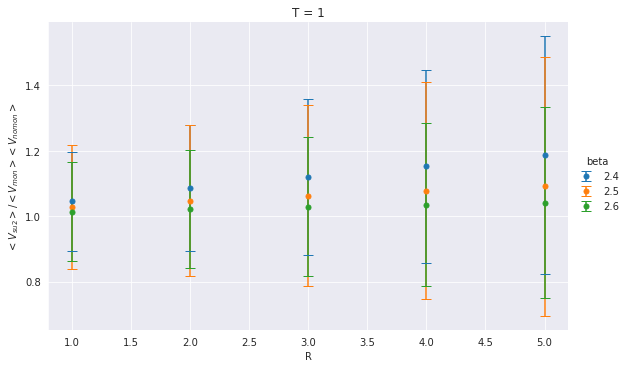

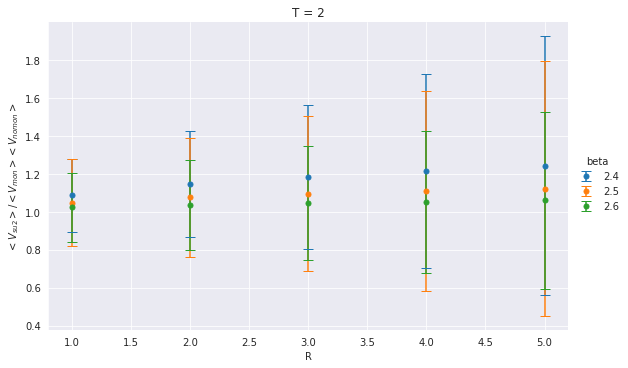

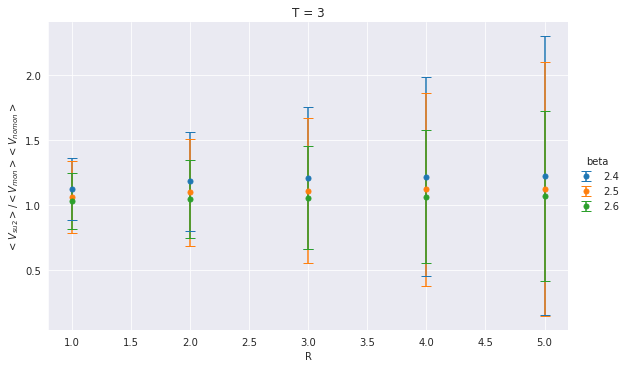

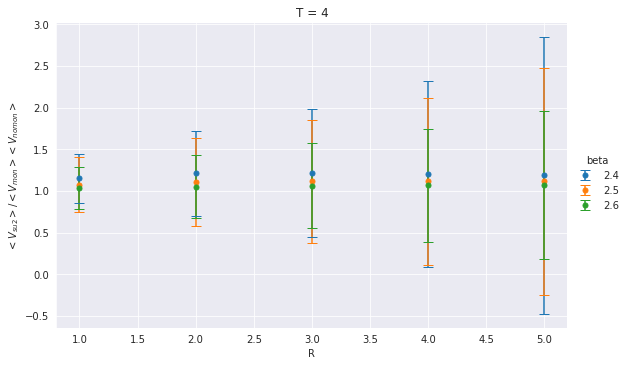

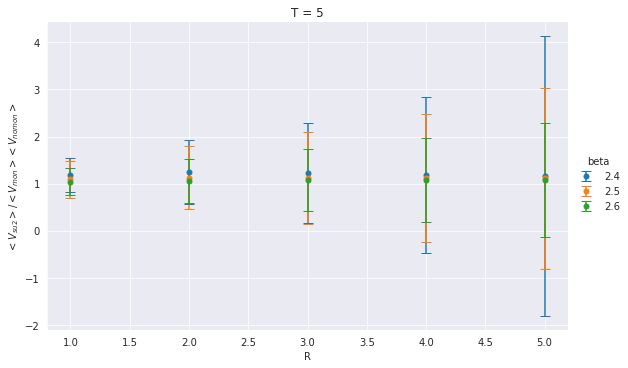

In [40]:
betas = [2.4, 2.5, 2.6]
compare_wilson_loop(betas)